# Distribuzione Gaussiana da una serie di numeri random

Importo la libreria numpy

In [6]:
import numpy as np

Fisso la media "mu" a 0 e la varianza "sigma" pari a 0.1

In [7]:
mu, sigma = 0, 0.1

Creo un vettore "s" con media mu e varianza sigma, di 100000 elementi grazie alla funzione random.normal di numnpy. Normal sta per distribuzione normale.

In [8]:
s = np.random.normal(mu, sigma, 100000) #np.random.normal(mean(center of the distribution), spread(std deviation), number of elements)
s

array([-0.04272129,  0.19376923, -0.15311245, ...,  0.10028088,
        0.24728206, -0.00088969])

Posso creare un vettore random usando anche altre funzioni, come linspace

In [43]:
x = np.linspace(mu, sigma) #np.linspace(initial value, final number, number of samples=[50])
len(x)

50

In [44]:
x

array([0.        , 0.00204082, 0.00408163, 0.00612245, 0.00816327,
       0.01020408, 0.0122449 , 0.01428571, 0.01632653, 0.01836735,
       0.02040816, 0.02244898, 0.0244898 , 0.02653061, 0.02857143,
       0.03061224, 0.03265306, 0.03469388, 0.03673469, 0.03877551,
       0.04081633, 0.04285714, 0.04489796, 0.04693878, 0.04897959,
       0.05102041, 0.05306122, 0.05510204, 0.05714286, 0.05918367,
       0.06122449, 0.06326531, 0.06530612, 0.06734694, 0.06938776,
       0.07142857, 0.07346939, 0.0755102 , 0.07755102, 0.07959184,
       0.08163265, 0.08367347, 0.08571429, 0.0877551 , 0.08979592,
       0.09183673, 0.09387755, 0.09591837, 0.09795918, 0.1       ])

Calcolo la media dei valori di s, che dovrebbe essere nulla

In [11]:
np.mean(s)

0.00041787239185793706

Per controllo, verifico se la differenza tra media empirica e calcolata (in modulo) è minore del valore scelto

In [46]:
abs(mu-np.mean(s))< .01

True

Lo faccio anche per la deviazione standard

In [47]:
abs(sigma - np.std(s)) < .01

True

Importo la libreria per il plotting dei grafici

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

Plotto s in un istogramma di 1000 barre

count, bins, ignored = plt.hist(s,1000, density = True)
plt.show()

Sovrappongo al plotting appena fatto, la curva gaussiana di equazione

$f(x) = \frac{1}{\sqrt{2\pi} \sigma} e^{-(x-\mu)^2/2 \pi \sigma^2}$


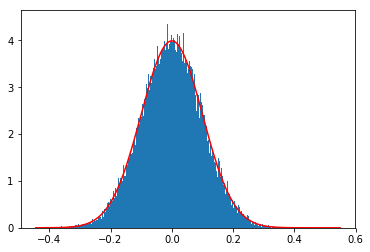

In [14]:
count, bins, ignored = plt.hist(s, 1000, density = True) #istogramma come sopra

plt.plot(bins,1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2)), color="r")

plt.show()

count è il valore sull'ordinata di ogni punto dell'istogramma di bins = 1000 per esempio

In [15]:
len(count)

1000

bins è il valore sulle ascisse di ogni "barra" dell'istogramma. In totale sono "count+1" bins

In [16]:
len(bins)

1001

ignored è un return che si ignora. In realtà definirebbe la lista di patches

In [17]:
ignored

<a list of 1000 Patch objects>

## Metodo dei momenti

Per applicare il metodo dei momenti è necessario importare le librerie "scipy.stats" e "pylab"

In [18]:
import scipy.stats as stats
import pylab as pl

Supponiamo di avere dei dati generici

In [27]:
h = sorted(list(np.random.normal(170, 201, size = 50)))
h

[-303.85452889292753,
 -224.63940412524283,
 -118.29273750230834,
 -99.57822074137948,
 -76.22462535308776,
 -68.85792799723978,
 -63.60918995925542,
 -39.84272450782609,
 -38.23159009695536,
 -8.461308555061407,
 18.007626000159206,
 25.803425029711434,
 27.0891813225347,
 36.65269210271674,
 39.49202831883542,
 49.49460619367771,
 66.8473673319091,
 78.96828301369688,
 79.11881677053233,
 82.30190735793896,
 104.04673010854154,
 112.18407107120622,
 120.17643207014694,
 184.98786680616308,
 189.48051674389114,
 189.82419848487746,
 196.9601790824378,
 233.0646790701745,
 234.1299604007399,
 249.21826669441396,
 254.25174502055978,
 267.94343663598625,
 276.9754893937997,
 285.9511348729773,
 286.7374163322604,
 337.85223651834485,
 361.8744344759201,
 385.42519249204145,
 387.7237316858562,
 390.0709192729279,
 403.958181729195,
 409.19564745867706,
 422.80218228987496,
 428.85417976069647,
 431.8225142109615,
 448.14763654663363,
 451.23524773875766,
 478.1732480246335,
 488.4322584

Applico il metodo dei momenti

In [30]:
fet = stats.norm.pdf(h, np.mean(h), np.std(h)) #stats.norm.pdf(h, mean of h, std dev of h)
fet

array([0.00011341, 0.00026757, 0.00066581, 0.00075967, 0.0008849 ,
       0.00092597, 0.00095563, 0.001093  , 0.00110245, 0.00127784,
       0.00143088, 0.00147454, 0.00148165, 0.00153373, 0.00154888,
       0.00160093, 0.00168563, 0.00173984, 0.00174048, 0.00175395,
       0.00183658, 0.00186296, 0.00188627, 0.00196972, 0.00196815,
       0.00196799, 0.0019634 , 0.00190372, 0.00190107, 0.00185838,
       0.00184208, 0.00179284, 0.00175667, 0.00171807, 0.00171456,
       0.00145378, 0.00131602, 0.00117745, 0.00116389, 0.00115005,
       0.00106853, 0.00103804, 0.00095982, 0.00092561, 0.00090898,
       0.00081957, 0.00080309, 0.00066605, 0.00061737, 0.00046284])

Plotto la curva

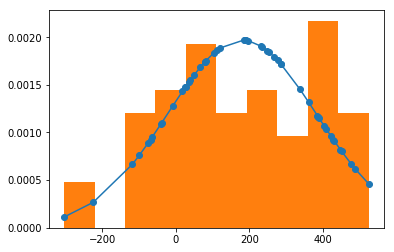

In [42]:
pl.plot(h,fet, 'o-')
pl.hist(h, density = True)
pl.show()